In [ ]:
# ------------------------------------------------------------------------------------------------------
# Simulación de un  Juego Evolutivo de tipo Piedra, Papel o Tijera
# ------------------------------------------------------------------------------------------------------
  if(FALSE) {
  "=====================================================================================================
 En este programa se simula la evolución de estrategias de un juego de tipo Piedra, Papel o Tijera, en este caso se usa el modelo biológico
 Uta stansburiana, que poseen fenotipos/estrategias determinados genéticamente asociados con los machos, los cuales son
 monogamos-cooperadores, dominantes y oportunistas, y estos siguen una dinamica ciclica similar al juego Piedra, Papal o Tijera [1], para describir
 este sistema se utiliza la dinámica del replicador, el cual es un modelo fundamental en la teoría de juegos evolutivos.
 La dinámica del replicador nos permite modelar cómo evolucionan las frecuencias de las estrategia en una población a lo largo del tiempo,
 basándose en el éxito relativo de cada estrategia [2].
  ======================================================================================================"
}


In [ ]:
# Primero se instala los paquetes de R necesarios para la simulación.
install.packages("ggplot2")
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Luego se cargan los paquetes.
library(ggplot2)  # ggplot2 nos permite generar gráficos.
library(tidyr) # tidyr nos permite transformar los datos para visualizarlos correctamente en ggplot2.

----------------------------------------------------------------------------------------------------------------------
       Simulacion de juego evolutivo basado en el modelo biologico ciclico no transitivo de Uta stansburian           
----------------------------------------------------------------------------------------------------------------------

1. Ingrese las proporciones iniciales de la poblacion (deben sumar 1).
Monogamos: 0.2
Dominantes: 0.2
Oportunistas: 0.6
2. Ingrese el tiempo de simulación. Se recomienda valores >=1000.
Tiempo: 1000
Iniciando simulación con proporciones iniciales: 0.2 0.2 0.6 
Se ha terminado la simulación...
- Estos son los resultados: 
Estadísticas de la simulación:
Proporciones iniciales: Monogamos = 0.2, Dominantes = 0.2, Oportunistas = 0.6 
Proporciones finales: Monogamos = 0.123, Dominantes = 0.435, Oportunistas = 0.441 



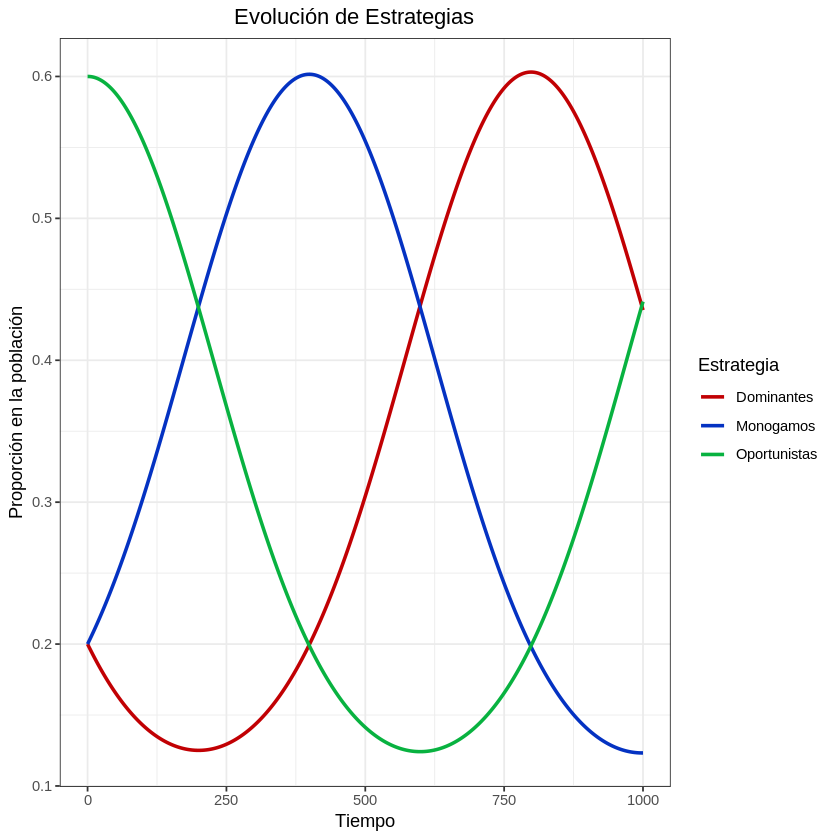

In [ ]:
#--------------------------------------------------------------------------------
# FUNCIÓN DE LA MATRIZ DE PAGOS
#--------------------------------------------------------------------------------
# En general, esta matriz de pago expresa cuánto gana un jugador al utilizar la estrategia de la fila (i) contra un oponente que utiliza
# la estrategia de la columna (j). En primer lugar se crea una función que genere la matriz de pago.
funcion_matriz_pagos <- function(){
    # Una matriz de pagos clásica para Piedra, Papel, Tijera consiste en:
    # - Empate: 0 puntos.
    # - Victoria: 1 punto.
    # - Derrota: -1 punto. [2]
    matriz_pago <- matrix(
        c(0, -1, 1,   # Monogamos vs [Monogamos, Dominantes, Oportunistas]
          1, 0, -1,   # Dominantes vs [Monogamos, Dominantes, Oportunistas]
          -1, 1, 0),  # Oportunistas (SLF) vs [Monogamos, Dominantes, Oportunistas]
        # Se quiere que la matriz tenga tres filas.
        nrow = 3,
        byrow = TRUE
    )

    if(FALSE) {
  "=====================================================================================================
  Ahora se le da nombre a las columnas y a las filas, para esto se usa las funciones colnames() y rownames(),
  que devuelven o establecen los nombres de las columnas y filas, siendo el parámetro la matriz de pago,
  en donde se guardan las etiquetas mediante una cadena [7].
  ======================================================================================================"
}
    colnames(matriz_pago) <- c("Monogamos", "Dominantes", "Oportunistas")
    rownames(matriz_pago) <- c("Monogamos", "Dominantes", "Oportunistas")

    # Esta matriz de pago representa una relación cíclica, donde no hay estrategias puras, y con ello no hay estrategias dominantes: [2]
    # - Monogamos vence a Oportunistas: matriz_pago[1,3] = 1
    # - Oportunistas vence a Dominantes: matriz_pago[3,2] = 1
    # - Dominantes vence a Monogamos: matriz_pago[2,1] = 1

    return(matriz_pago)
}


#---------------------------------------------------------------------------------
# INICIALIZACIÓN DE LA POBLACIÓN
#---------------------------------------------------------------------------------
# Establece la distribución inicial de estrategias en la población.

 if(FALSE) {
  "===================================================================================================================================
  Este tipo de juego es simétrico, es decir las estrategias y pagos son idénticos para ambos jugadores, por que se considera de suma cero. [2]
  Primero se inicia con proporciones iniciales, dadas por el usuario.
  ===================================================================================================================================="
}

inicializar_poblacion <- function(proporciones_iniciales) {

    # Se devuelve las proporciones como un vector con los nombres de cada estrategia.
    vector_nombres <- c("Monogamos", "Dominantes", "Oportunistas")
    names(proporciones_iniciales) <- vector_nombres
    return(proporciones_iniciales)
}

#--------------------------------------------------------------------------------
# FUNCIÓN DEL REPLICADOR DINÄMICO
#--------------------------------------------------------------------------------
# Esta función implementa la dinámica del replicador, una ecuación diferencial
# que modela cómo cambian las frecuencias de las estrategias en una población [2].
#
# La ecuación de la dinámica del replicador es:
# dx/dt = x_i * (f_i - f_promedio) [3][4][6]
# dx = dt[x_i * (f_i - f_promedio)]
# donde:
# - x_i es la proporción de la población que usa la estrategia i.
# - f_i es el fitness de la estrategia i.
# - f_promedio es el fitness promedio de toda la población.
replicador = function(proporciones, matriz_pagos, delta_t = 0.01) {

    # Se calcula el fitness de cada estrategia, para esto se realiza la multiplicación de matrices con el operador %*%
    fitness = matriz_pagos %*% proporciones

    # Se calcula el fitness promedio de la población.
    fitness_promedio = sum(proporciones * fitness)

    # Se calculan nuevas proporciones de acuerdo a la ecuación del replicador dinámico.
    nuevas_proporciones = proporciones + delta_t * proporciones * (fitness - fitness_promedio)

    # Se normaliza los valores para  que la suma sea 1.
    nuevas_proporciones = nuevas_proporciones / sum(nuevas_proporciones)

    return(nuevas_proporciones)

    # [5]
}

#--------------------------------------------------------------------------------
# FUNCIÓN DE SIMULACIÓN DE LA EVOLUCIÓN
#--------------------------------------------------------------------------------
# Esta función permite iniciar la simulación a través del tiempo previamente seleccionado por el usuario, registrando la evolución de las
# proporciones de cada estrategia.

simular_evolucion = function(proporciones_iniciales,
                              tiempo,
                              delta_t = 0.01) {
    # Se inicia con la matriz de pago y con las proporciones.
    matriz_pagos = funcion_matriz_pagos()
    proporciones = inicializar_poblacion(proporciones_iniciales)

    # Se crea un dataframe para almacenar la evolución de las proporciones a través del tiempo.
    resultado <- data.frame(
        # Se inicia desde tiempo = 0 hasta el tiempo ingresado por el usuario.
        tiempo = 0:tiempo,
        Monogamos = numeric(tiempo + 1),
        Dominantes = numeric(tiempo + 1),
        Oportunistas = numeric(tiempo + 1)
    )

    # Se añaden las proporciones iniciales, para la fila 1, empezando desde la columna 2, ya que la columna 1 son los tiempos.
    resultado[1, 2:4] = proporciones

    # Se simula la evolución para cada tiempo
    for(i in 1:tiempo) {
        # Se generan las proporciones nuevas usando la función del replicador
        proporciones = replicador(proporciones, matriz_pagos, delta_t)

        # Se registran las nuevas proporciones
        resultado[i + 1, 2:4] = proporciones
    }

    return(resultado)
}

#---------------------------------------------------------------------
# FUNCIÓN DE VISUALIZACIÓN DE RESULTADOS
#---------------------------------------------------------------------
# Esta función crea gráficos para visualizar la evolución de las proporciones
visualizar_evolucion = function(datos_evolucion) {
    # Se transforman los datos para ser visualizados correctamente mediante ggplot2, haciendo uso de la librería tidyr [7]
    datos_transformados = datos_evolucion %>%
    pivot_longer(
    cols = -tiempo,
    names_to = "Estrategia",
    values_to = "Proporcion"
               )

    # Se grafica la curva de la evolución de las estrategias a través del tiempo.
    grafico = ggplot(datos_transformados, aes(x = tiempo, y = Proporcion, color = Estrategia)) +
        geom_line(size = 1) +
        labs(title = "                             Evolución de Estrategias",
             x = "Tiempo",
             y = "Proporción en la población") +
        theme_bw() +
        scale_color_manual(values = c("Monogamos" = "#0432c2", "Dominantes" = "#c10003", "Oportunistas" = "#08b240"))

    # Se imprimen las proporciones iniciales y finales de la simulación.
    cat("\nEstadísticas de la simulación:\n")
    cat("Proporciones iniciales:",
        paste0("Monogamos = ", round(datos_evolucion$Monogamos[1], 3), ", ",
               "Dominantes = ", round(datos_evolucion$Dominantes[1], 3), ", ",
               "Oportunistas = ", round(datos_evolucion$Oportunistas[1], 3)), "\n")
    cat("Proporciones finales:",
        paste0("Monogamos = ", round(datos_evolucion$Monogamos[nrow(datos_evolucion)], 3), ", ",
               "Dominantes = ", round(datos_evolucion$Dominantes[nrow(datos_evolucion)], 3), ", ",
               "Oportunistas = ", round(datos_evolucion$Oportunistas[nrow(datos_evolucion)], 3)), "\n\n")
    return(grafico)
}

#--------------------------------------------------------------------------------
# FUNCIÓN PRINCIPAL
#--------------------------------------------------------------------------------
# Permite gestionar todo el proceso: inicialización, simulación y visualización.
simulacion_evolutiva = function(proporciones_iniciales,
                                          tiempo,
                                          delta_t = 0.01) {
    # Se ejecuta la simulación.
    cat("Iniciando simulación con proporciones iniciales:", proporciones_iniciales, "\n")
    resultados <- simular_evolucion(proporciones_iniciales, tiempo, delta_t)

    # Se visualiza los resultados en la pantalla.
    cat("Se ha terminado la simulación...\n")
    cat("- Estos son los resultados: ")
    visualizar_evolucion(resultados) #[7]

}


# --------------------------------------------------------------------------------------------------------------------------
  # CAMPO DE INGRESO DE DATOS DEL USUARIO
# --------------------------------------------------------------------------------------------------------------------------
  if(FALSE) {
  "===================================================================================================================================
  Esta sección de código permitirá al usuario ingrese los valores iniciales de las proporciones de las tres estrategias que considere
  convenientes. para su posterior simulación, además ingresará el tiempo de simulación, el cual se recomienda sea mayor o igual a 1000
  para una mejor visualización de los resultados. Los valores iniciales se pueden colocar fraccionados (1/3) o númericos (0.5),
  ya que el método eval(parse()), nos permite evaluar una cadena y transformarla en un valor númerico que sea interpretado correctamente
  por R [7].
  ===================================================================================================================================="
}
cat("----------------------------------------------------------------------------------------------------------------------\n")
cat("       Simulacion de juego evolutivo basado en el modelo biologico ciclico no transitivo de Uta stansburiana           \n")
cat("----------------------------------------------------------------------------------------------------------------------\n\n")
cat("1. Ingrese las proporciones iniciales de la poblacion (deben sumar 1).\n")
m_input = readline(prompt = "Monogamos: ")
m = eval(parse(text= m_input))
d_input = readline(prompt = "Dominantes: ")
d = eval(parse(text=d_input))
o_input = readline(prompt = "Oportunistas: ")
o = eval(parse(text=o_input))
cat("2. Ingrese el tiempo de simulación. Se recomienda valores >=1000.\n")
t_input = readline(prompt = "Tiempo: ")
t = eval(parse(text=t_input))
if(sum(abs(m+d+o)) != 1) {
        stop("Las proporciones son incorrectas deben sumar 1")
    } else{simulacion_evolutiva(c(m,d,o), t)}







**BIBLIOGRAFIA**





*   [1] Griffon, D. (2024). Evolución y la Teoría de Juegos (piedra papel o tijera) [Video]. YouTube. https://www.youtube.com/watch?v=RHaxTjyN1BU&t=4s
*   [2] Rodríguez, M. (2019). Modelos para juegos evolutivos. Departamento de Matemática. Facultad de Ciencias Exactas y Naturales. Universidad de Buenos Aires, pp. 34.
*   [3] Delesse, F. (2016). Stochastic Replicator Dynamics. Universite Paris-Dauphine, pp. 5.
*   [4] Cordova, C., Jovero, R. & Thomas, E. (2018). Rock Paper Scissorsand Evolutionary Game Theory. University Libreries.
*   [5] Quintas Pereira, I. (2013). Implementación del algoritmo del replicador dinámico en Lenguaje R. Política y cultura, (39), 251-261. Recuperado en 1 de marzo de 2025, de http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0188-77422013000100013&lng=es&tlng=es.
*   [6] Monsalve, C. (2025). Análisis de modelos para simular un juego evolutivo tipo Piedra, Papel o Tijera [Analiza con detalle lo siguiente: Indícame los modelos matemáticos más estudiados y óptimos para simular un juego evolutivo de tipo Piedra, Papel o Tijera, para ello investiga en textos científicos en teoría evolutiva de juegos. Por última indícame la bibliografía utilizada]. ChatGPT (Versión 1 de Marzo). https://copilot.microsoft.com/
*   [7] R Core Team. (2023). _R: A language and environment for statistical computing_ (Version 4.3.1) [Computer software]. R Foundation for Statistical Computing. https://www.R-project.org/














